# Avacado Project

# 1. Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

# 2. Dataset Description

- Date - The date of the observation

- AveragePrice - the average price of a single avocado

- type - conventional or organic

- year - the year

- Region - the city or region of the observation

- Total Volume - Total number of avocados sold

- 4046 - Total number of avocados with PLU 4046 sold

- 4225 - Total number of avocados with PLU 4225 sold

- 4770 - Total number of avocados with PLU 4770 sold


# 3.Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 4.Import Dataset

In [2]:
data=pd.read_csv("avocado.csv")

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# 5.  Basic Data Exploration

**Below are the explanation of each columns.**

- Date - Observation date
- AveragePrice - Single Avocado average price.
- Type - Organic/Conventional 
- Region - Region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags – Total bags sold
- Small/Large/XLarge Bags – Total bags sold by size

### 5.1 Shape of Dataset

In [4]:
data.shape

(18249, 14)

**Dataset having 18249 observation and 14 columns**

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

**Exploring dataset columns name.**

### 5.2 Basic Data Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**Below are the observation from above:**

- Unnamed 0 columns no need for analysis so we need to drop the column
- There are 9 columns type which are float, 2 are integer and 3 are object type.
- AveragePrice would be our target variable which are in float data type.


### 5.3 Dropping unwanted columns.

In [7]:
data.drop("Unnamed: 0",axis=1,inplace=True)

### 5.4 Statistical Summary

In [8]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**Below are the observation:**

- Number of rows in each columns are same which indicate that no null value present.We will confirm this again.

- The mean value and 50% value of almost all columns (except few columns) are same and also the STD and mean value is very close.

- Most of the columns minimum data value is 0

- By seeing the difference between 75% value and maximum value which indicate that there would be outlier which we will confirm.

### 5.5 Checking null value

In [9]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**There are no null value in dataset.**

### 5.6 Checking duplicate value

In [10]:
duplicate=data.duplicated(keep="last")
duplicate.sum()

0

**There are no duplicate value in dataset.**

# 6. Dealing with zero value

### Dealing zero value in 4046

In [11]:
data[data["4046"]==0]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9130,2015-11-29,1.94,831.69,0.0,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany
9323,2015-03-15,1.63,1777.09,0.0,1209.68,0.0,567.41,366.67,200.74,0.0,organic,2015,Boise
9329,2015-02-01,1.43,1780.76,0.0,999.31,0.0,781.45,283.33,498.12,0.0,organic,2015,Boise
9332,2015-01-11,1.44,2378.68,0.0,1923.40,0.0,455.28,170.00,285.28,0.0,organic,2015,Boise
9386,2015-12-27,1.47,5043.15,0.0,166.37,0.0,4876.78,2751.87,2124.91,0.0,organic,2015,BuffaloRochester
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,2018-01-14,1.54,3737.85,0.0,1199.91,0.0,2537.94,1769.94,768.00,0.0,organic,2018,Louisville
17966,2018-02-18,1.58,29699.89,0.0,195.20,0.0,29504.69,29504.69,0.00,0.0,organic,2018,NorthernNewEngland
17967,2018-02-11,1.39,22495.69,0.0,176.23,0.0,22319.46,22319.46,0.00,0.0,organic,2018,NorthernNewEngland
17969,2018-01-28,1.29,50288.63,0.0,383.92,0.0,49904.71,49904.71,0.00,0.0,organic,2018,NorthernNewEngland


**As we can see there are 242 rows are zero value.**

In [12]:
data["4046"]=data["4046"].replace(0,data["4046"].mean())

In [13]:
data[data["4046"]==0]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


### Dealing zero value in 4225

In [14]:
data[data["4225"]==0]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10420,2015-02-08,1.72,2118.66,945.33,0.0,0.0,1173.33,1173.33,0.00,0.0,organic,2015,MiamiFtLauderdale
10531,2015-12-20,1.66,1822.24,470.42,0.0,0.0,1351.82,1351.82,0.00,0.0,organic,2015,NewOrleansMobile
10532,2015-12-13,1.60,1529.16,424.70,0.0,0.0,1104.46,1104.46,0.00,0.0,organic,2015,NewOrleansMobile
10533,2015-12-06,1.35,2211.53,294.65,0.0,0.0,1916.88,1916.88,0.00,0.0,organic,2015,NewOrleansMobile
10534,2015-11-29,1.58,2041.47,221.95,0.0,0.0,1819.52,1812.85,6.67,0.0,organic,2015,NewOrleansMobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16218,2017-02-12,1.33,6425.79,254.69,0.0,0.0,6171.10,5927.54,243.56,0.0,organic,2017,NewOrleansMobile
16220,2017-01-29,1.30,2939.28,129.28,0.0,0.0,2810.00,1861.27,948.73,0.0,organic,2017,NewOrleansMobile
16223,2017-01-08,1.26,5077.97,189.58,0.0,0.0,4888.39,3309.59,1578.80,0.0,organic,2017,NewOrleansMobile
16570,2017-06-25,1.54,2406.34,165.75,0.0,0.0,2240.59,2226.75,13.84,0.0,organic,2017,Pittsburgh


**As we can see there are 61 rows where value is zero.**

In [15]:
data["4225"]=data["4225"].replace(0,data["4225"].mean())

In [16]:
data[data["4225"]==0]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


### Dealing zero value in 4770

In [17]:
data[data["4770"]==0]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2998,2016-05-01,0.63,82585.83,32240.97,3928.02,0.0,46416.84,46257.90,140.79,18.15,conventional,2016,Boise
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.00,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.00,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.00,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.00,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18241,2018-02-25,1.57,18421.24,1974.26,2482.65,0.0,13964.33,13698.27,266.06,0.00,organic,2018,WestTexNewMexico
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.0,13776.71,13553.53,223.18,0.00,organic,2018,WestTexNewMexico
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.0,12693.57,12437.35,256.22,0.00,organic,2018,WestTexNewMexico
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.0,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico


In [18]:
data["4770"]=data["4770"].replace(0,data["4770"].mean())

In [19]:
data[data["4770"]==0]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


# 7. Converting Date column into month and day.

In [20]:
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
data["month"]=data["Date"].dt.month

In [22]:
data["day"]=data["Date"].dt.day

In [23]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


**As we can see that we have converted Date column into month and days for our analysis.**

### Drop Date columns as we have converted to month and days.

In [24]:
data=data.drop("Date",axis=1)

In [25]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


# 7.Seperating Numerical and Categorical columns

In [26]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in data.columns:
    if data[column].dtypes in num:
        numeric_feat.append(column)
    if data[column].dtypes in cat:
        categorical_feat.append(column)

In [27]:
numeric_feat

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'month',
 'day']

In [28]:
numeric_data=data[numeric_feat]

In [29]:
numeric_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,0.0,2018,1,14


In [30]:
categorical_feat

['type', 'region']

In [31]:
categorical_data=data[categorical_feat]

In [32]:
categorical_data

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


# 8 Exploratory Data Analysis

## 8.1 Univariate Analysis

### AveragePrice

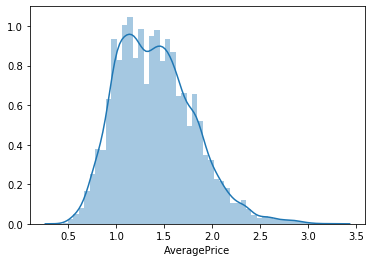

In [33]:
sns.distplot(data["AveragePrice"])

In [34]:
data["AveragePrice"].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

**We can interpret from above table that AveragePrice data is normally distributed.**

### TotalVolume

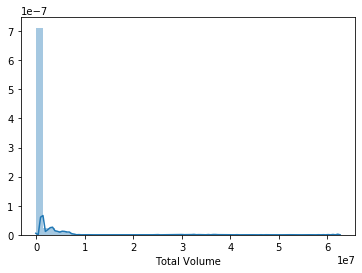

In [35]:
sns.distplot(data["Total Volume"])

In [36]:
data["Total Volume"].describe()

count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64

**We can interpret that data is not distributed normally and also having some outliers.**

### 4046

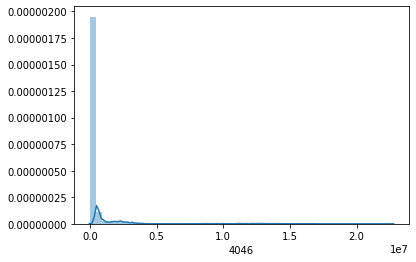

In [37]:
sns.distplot(data["4046"])

In [38]:
data["4046"].describe()

count    1.824900e+04
mean     2.968940e+05
std      1.264533e+06
min      1.000000e+00
25%      9.750900e+02
50%      9.954770e+03
75%      1.217699e+05
max      2.274362e+07
Name: 4046, dtype: float64

**We can interpret that data is not distributed normally and also having some outliers.**

### 4225

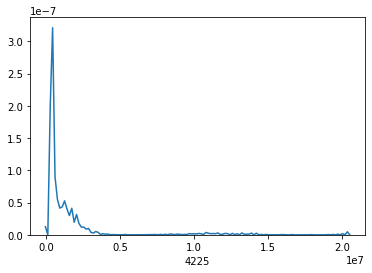

In [39]:
sns.distplot(data["4225"],hist=False)

In [40]:
data["4225"].describe()

count    1.824900e+04
mean     2.961412e+05
std      1.203999e+06
min      1.260000e+00
25%      3.086950e+03
50%      2.977364e+04
75%      1.542584e+05
max      2.047057e+07
Name: 4225, dtype: float64

**We can interpret that data is not distributed normally and also having some outliers.**

### 4770

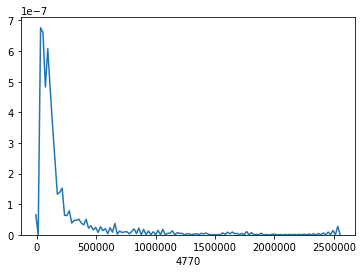

In [41]:
sns.distplot(data["4770"],hist=False)

In [42]:
data["4770"].describe()

count    1.824900e+04
mean     2.971957e+04
std      1.065084e+05
min      8.300000e-01
25%      3.786500e+02
50%      1.111933e+04
75%      2.283974e+04
max      2.546439e+06
Name: 4770, dtype: float64

**We can interpret that data is not distributed normally and also having some outliers.**

### Total Bags

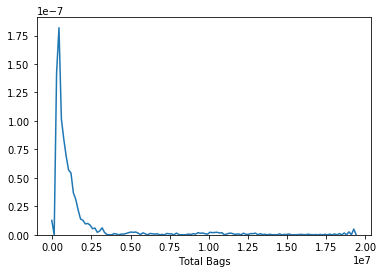

In [43]:
sns.distplot(data["Total Bags"],hist=False)

In [44]:
data["Total Bags"].describe()

count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64

**We can interpret that data is not distributed normally and also having some outliers.**

### Small Bags

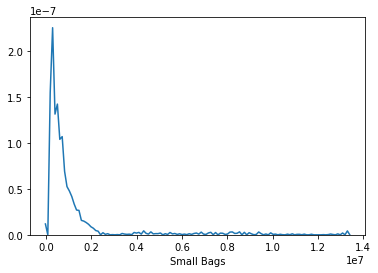

In [45]:
sns.distplot(data["Small Bags"],hist=False)

In [46]:
data["Small Bags"].describe()

count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: Small Bags, dtype: float64

**We can interpret that data is not distributed normally and also having some outliers.**

### Large Bags

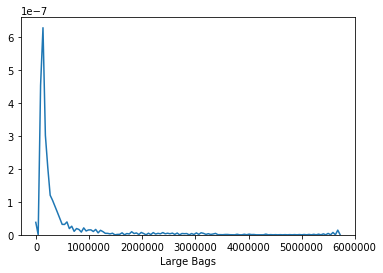

In [47]:
sns.distplot(data["Large Bags"],hist=False)

In [48]:
data["Large Bags"].describe()

count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: Large Bags, dtype: float64

### Xlarge Bags

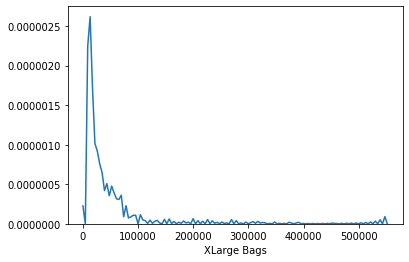

In [49]:
sns.distplot(data["XLarge Bags"],hist=False)

In [50]:
data["XLarge Bags"].describe()

count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64

### Type

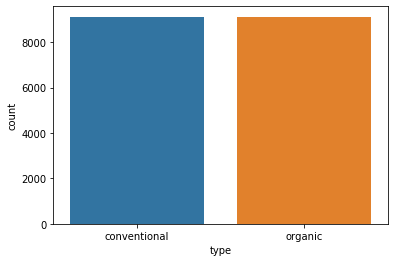

In [51]:
sns.countplot(data["type"])

In [52]:
data["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

### year

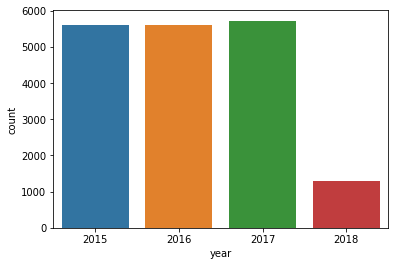

In [53]:
sns.countplot(data["year"])

In [54]:
data["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

**There are four year of data available in dataset.**

### Region

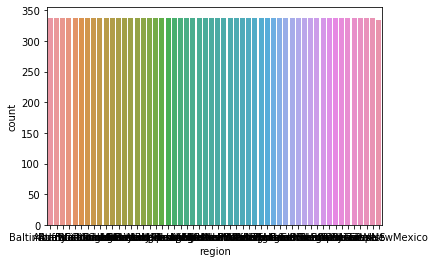

In [55]:
sns.countplot(data["region"])

In [56]:
data["region"].nunique()

54

**There are 54 region in dataset.**

## 8.2 Bivariate Analysis

### AveragePrice Vs Year

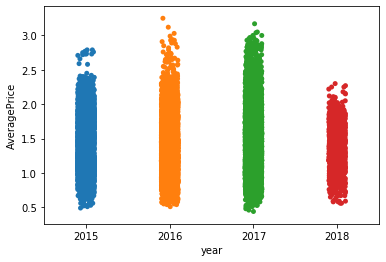

In [57]:
sns.stripplot(data["year"],data["AveragePrice"])

**Here in above plot, we can see in 2016 and 2017 avocado avg price was more and 2018 it was very less compare to other years.**

### AveragePrice Vs Total Volume

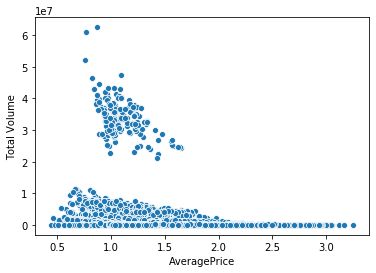

In [58]:
sns.scatterplot(x="AveragePrice",y="Total Volume",data=data)

**As we can see there are some outlier presence in dataset, also we can see when avg price is less than 2 there were good volume of sale.**

### AveragePrice Vs Region

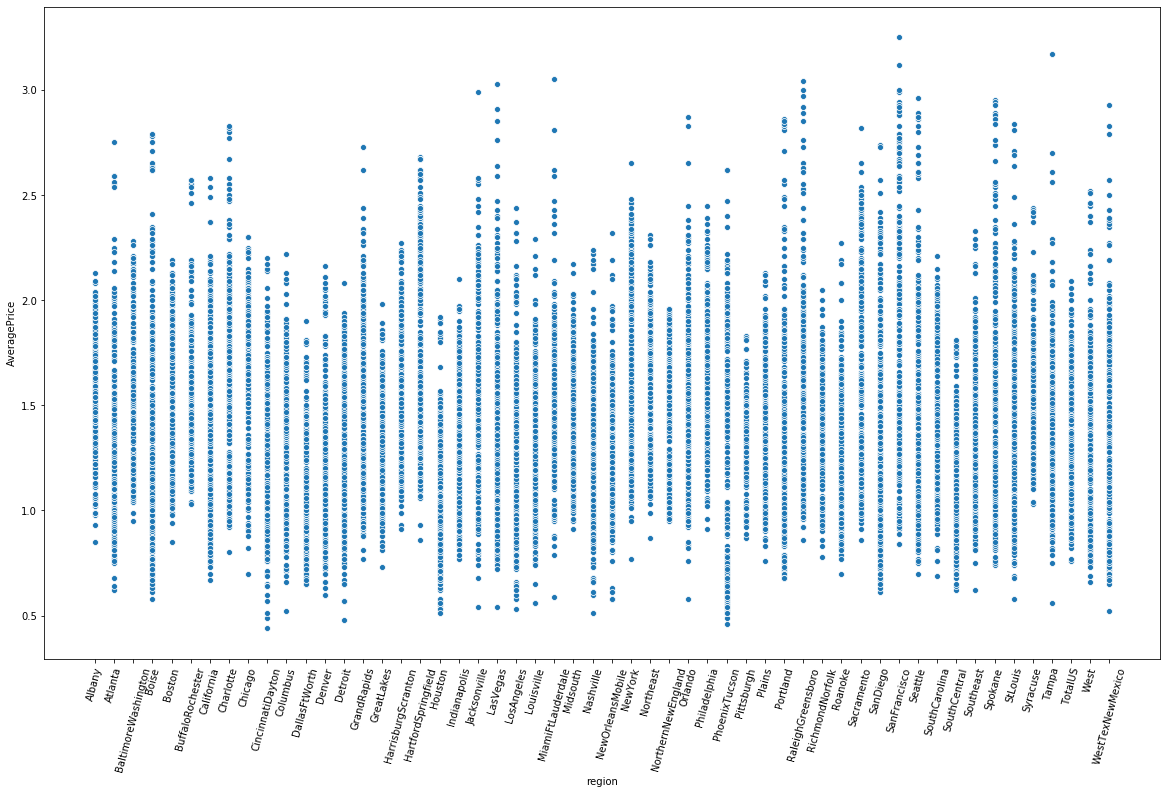

In [59]:
fig = plt.gcf()
fig.set_size_inches(20, 12)
s=sns.scatterplot(x="region",y="AveragePrice",data=data)
x=data["region"].unique()
s.set_xticklabels(x,rotation=75)
plt.show()

**As we can interpret that there are some region where average price is quite high and many region average price of avocado is below 2.5.**

### Average price vs Type

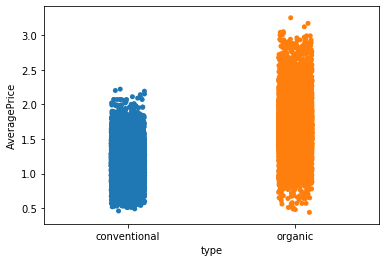

In [60]:
sns.stripplot(x="type",y="AveragePrice",data=data)

**We can interpret that organic type avocado average price is more than conventional type avocado.**

### Averageprice vs Month

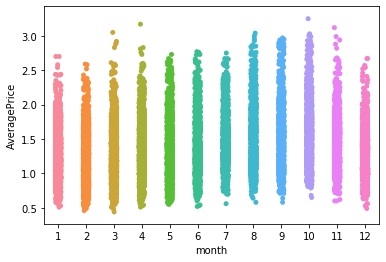

In [61]:
sns.stripplot(x="month",y="AveragePrice",data=data)

In [62]:
data.groupby("month")["AveragePrice"].mean()

month
1     1.311019
2     1.274387
3     1.332255
4     1.374380
5     1.346601
6     1.408964
7     1.462077
8     1.512514
9     1.572654
10    1.579683
11    1.455563
12    1.331112
Name: AveragePrice, dtype: float64

**From the above plot we can see that in the month of april,june,july,august,septemper,October,Noverber the average price is more than other month.**

### Total Volumne Vs Month

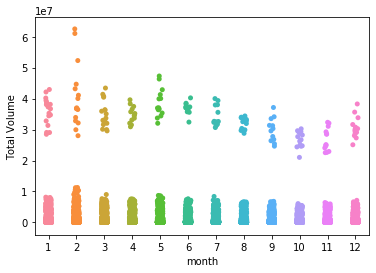

In [63]:
sns.stripplot(x="month",y="Total Volume",data=data)

In [64]:
data.groupby("month")["Total Volume"].mean()

month
1     9.035654e+05
2     1.018825e+06
3     8.845054e+05
4     8.801935e+05
5     9.727150e+05
6     9.293397e+05
7     8.590482e+05
8     8.036857e+05
9     7.533192e+05
10    6.803941e+05
11    6.796073e+05
12    7.746305e+05
Name: Total Volume, dtype: float64

**here we can interpret that in the month of Feb the avg price of avacode is less hence this month the total volume sold is high compare to other month.Also the month when avg price is high sold volume also is less for those month.**

### Total Volume Vs Year

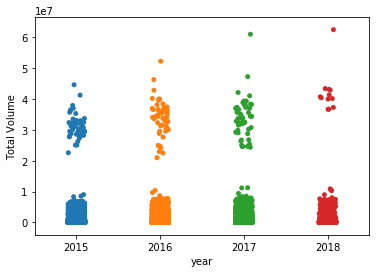

In [65]:
sns.stripplot(x="year",y="Total Volume",data=data)

**we can see in the year of 2016 and 2017 total volume sold was more and 2018 total volume was very less.**

### Total Volume Vs Type

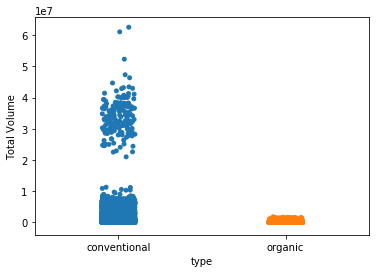

In [66]:
sns.stripplot(x="type",y="Total Volume",data=data)

**we can see conventional type avocado sold volume is more than organic, this could be due to less avg price of conventional avocado than organic.**

### Total Volume Vs region

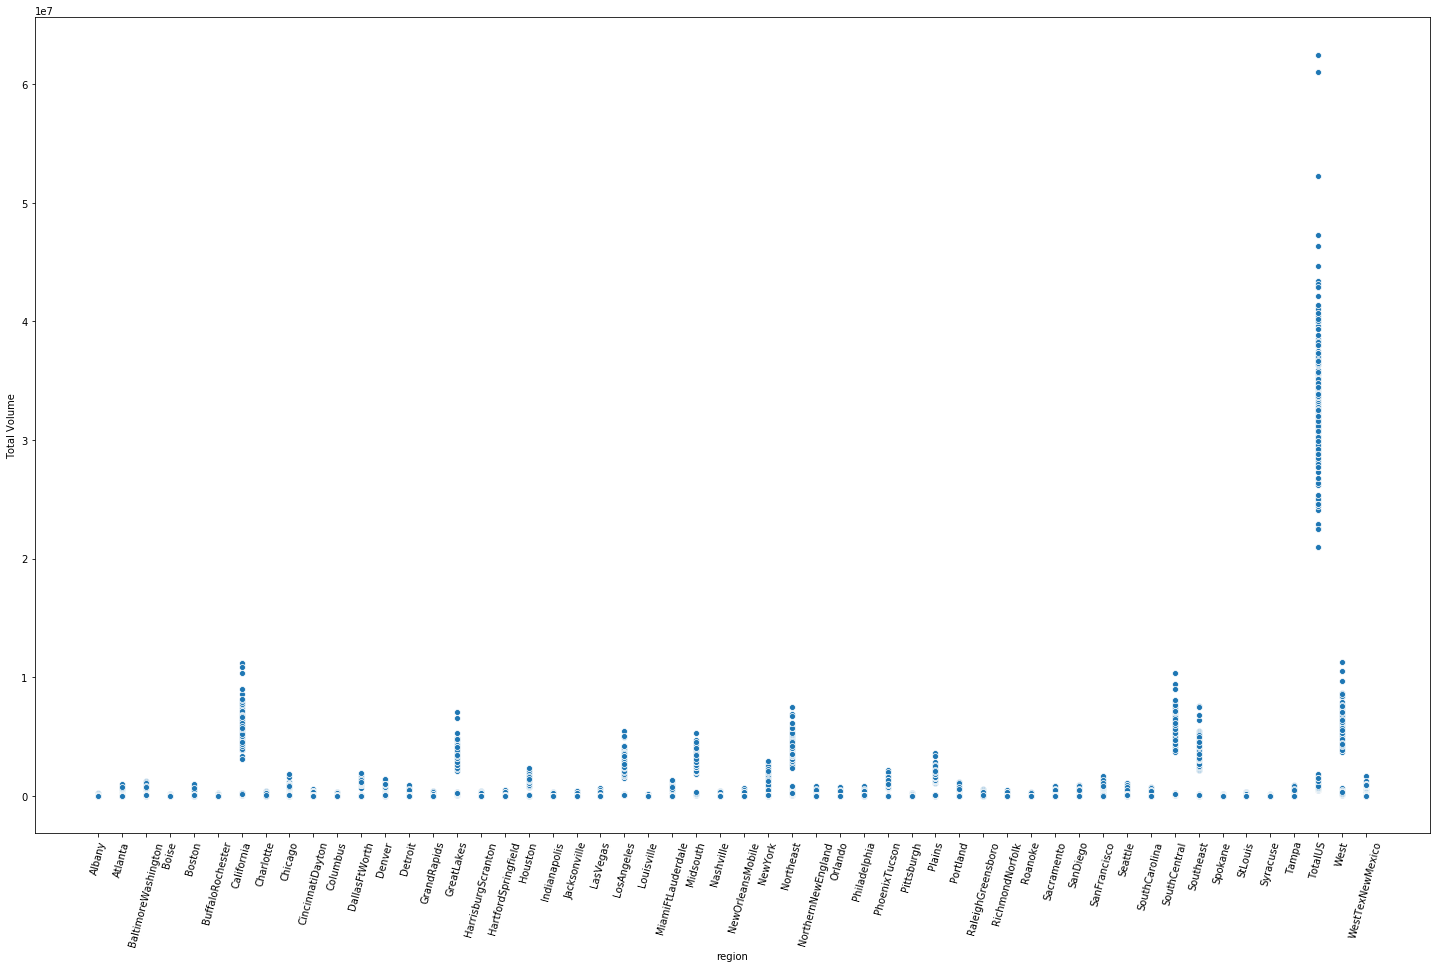

In [67]:
fig = plt.gcf()
fig.set_size_inches(25, 15)
s=sns.scatterplot(x="region",y="Total Volume",data=data)
x=data["region"].unique()
s.set_xticklabels(x,rotation=75)
plt.show()

**As we can see that there are some region where total volumn sale was higher than other region.**

### Type Vs Avgprice

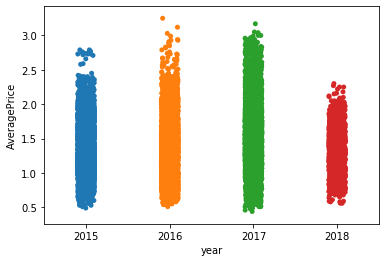

In [68]:
sns.stripplot(x="year",y="AveragePrice",data=data)

In [69]:
data.groupby("year")["AveragePrice"].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

**here we can see the avg price of Avocado is more in 2017 and less in 2016 compare to other year.**

### Type Vs Year

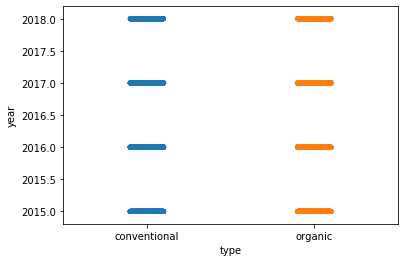

In [70]:
sns.stripplot(x="type",y="year",data=data)

In [71]:
data.groupby("year")["type"].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

**we can interpret the how much avocado type selling in year.**

# 8.3 Miltivariate Analysis

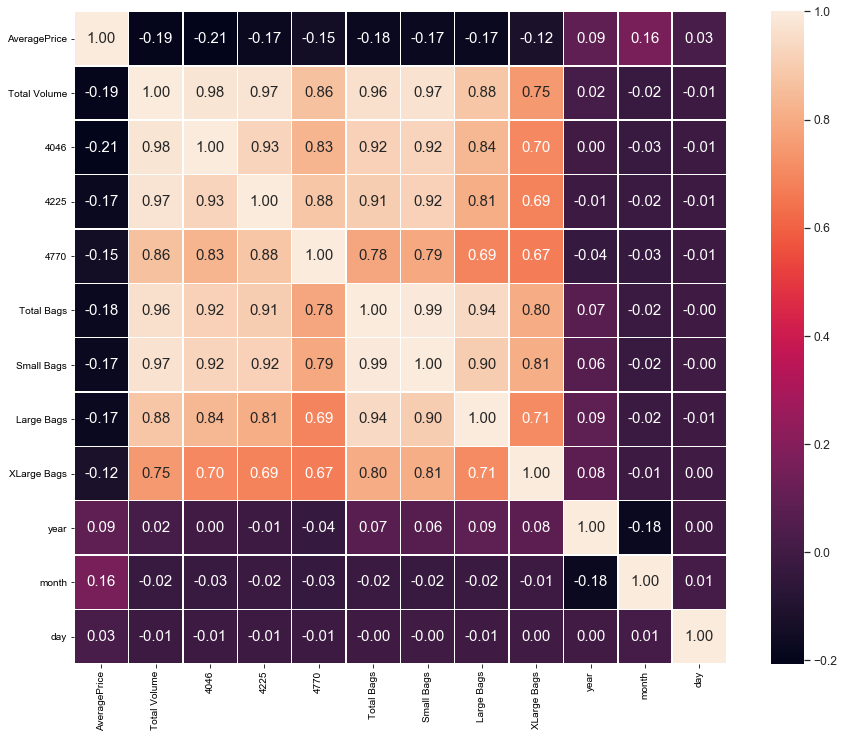

In [72]:
plt.subplots(figsize=(16, 12))
cm=np.corrcoef(data[numeric_feat].values.T)
sns.set(font_scale=1.1)
heatmap=sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = numeric_feat, xticklabels = numeric_feat,linewidths=.5)

**Below are the observation.**

- Total Volume and Total Bags,small Bags are highly correleated.

- Total Volume and 4046,4225 are highly correleated.

### Total Volume Vs small,Large,Xlarge

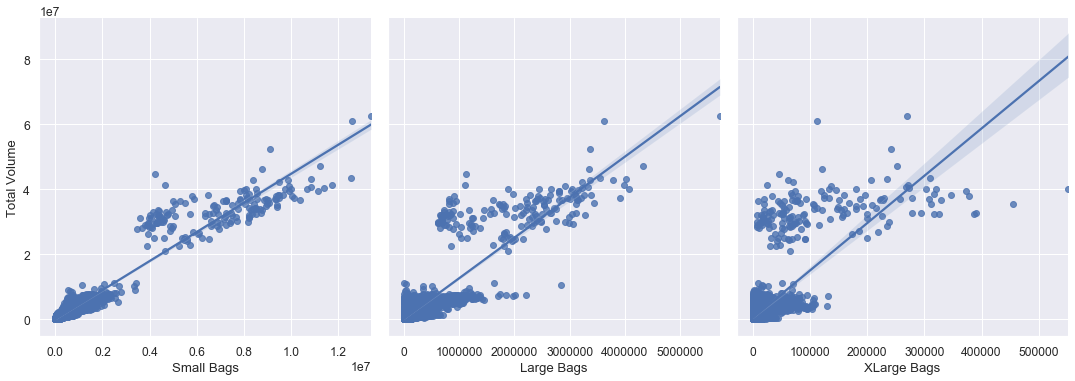

In [73]:
sns.pairplot(data, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

**As we can see Small Bags and Total Volume are highly correleated compare to Large Bags and Xlarge Bags.**

### Total Bags Vs small,Large,Xlarge

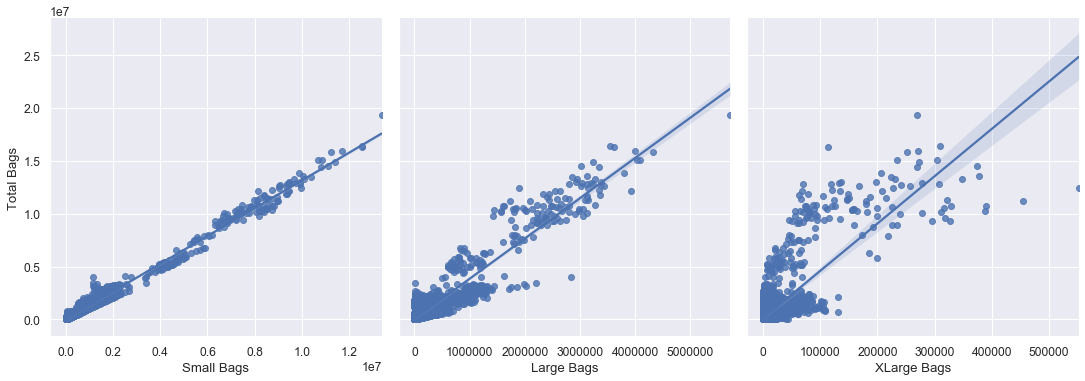

In [74]:
sns.pairplot(data, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

**As we can see Total Bags and Small Bags,Large Bags are highly coreleated.**

### Region Vs AveragePrice Vs year

Text(0.5, 1.0, 'Yearly Average Price Region')

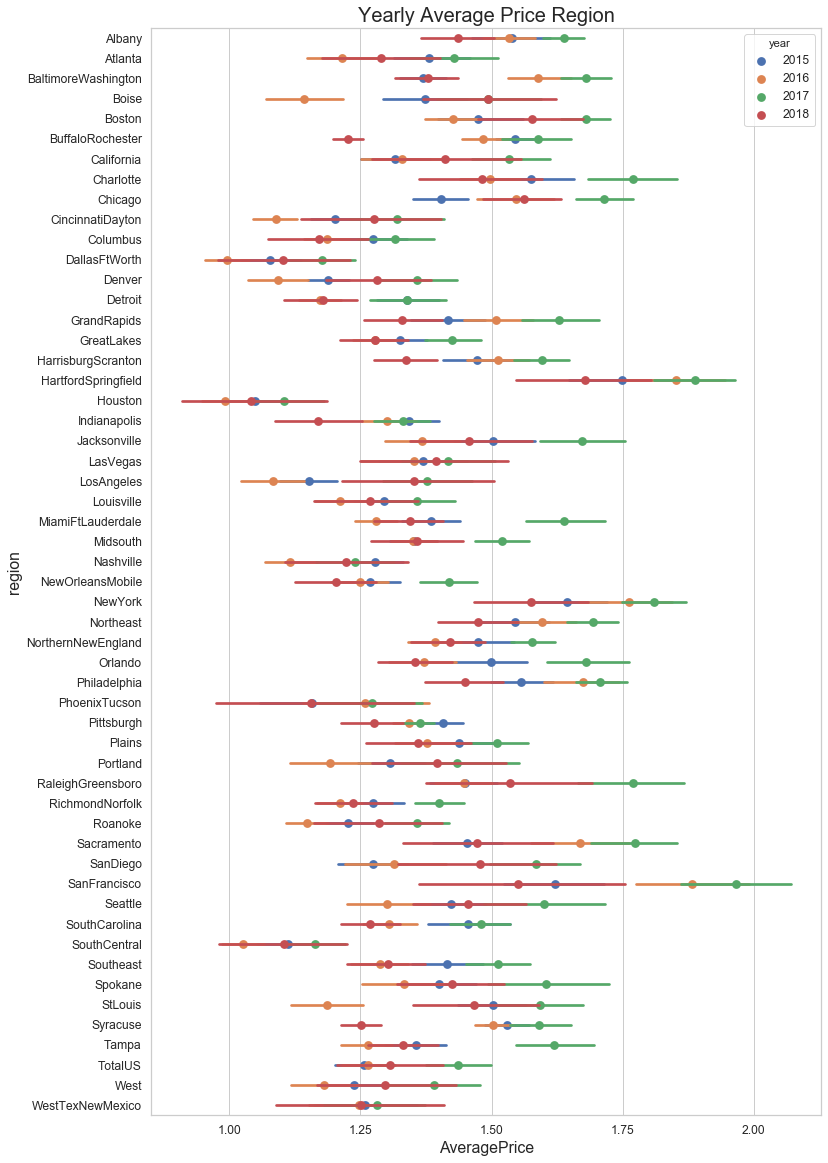

In [75]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('AveragePrice',{'fontsize' : 'large'})
plt.ylabel('region',{'fontsize':'large'})
plt.title("Yearly Average Price Region",{'fontsize':20})

**We can see there are some region where average price is high like SanFrancisco, HartfordSpringfield, sacramento, RaleighGreensboro, NewYork, charlotte where avg price is more than 1.75.**

### Region Vs Average Price Vs Type

Text(0.5, 1.0, 'Type Average Price Region')

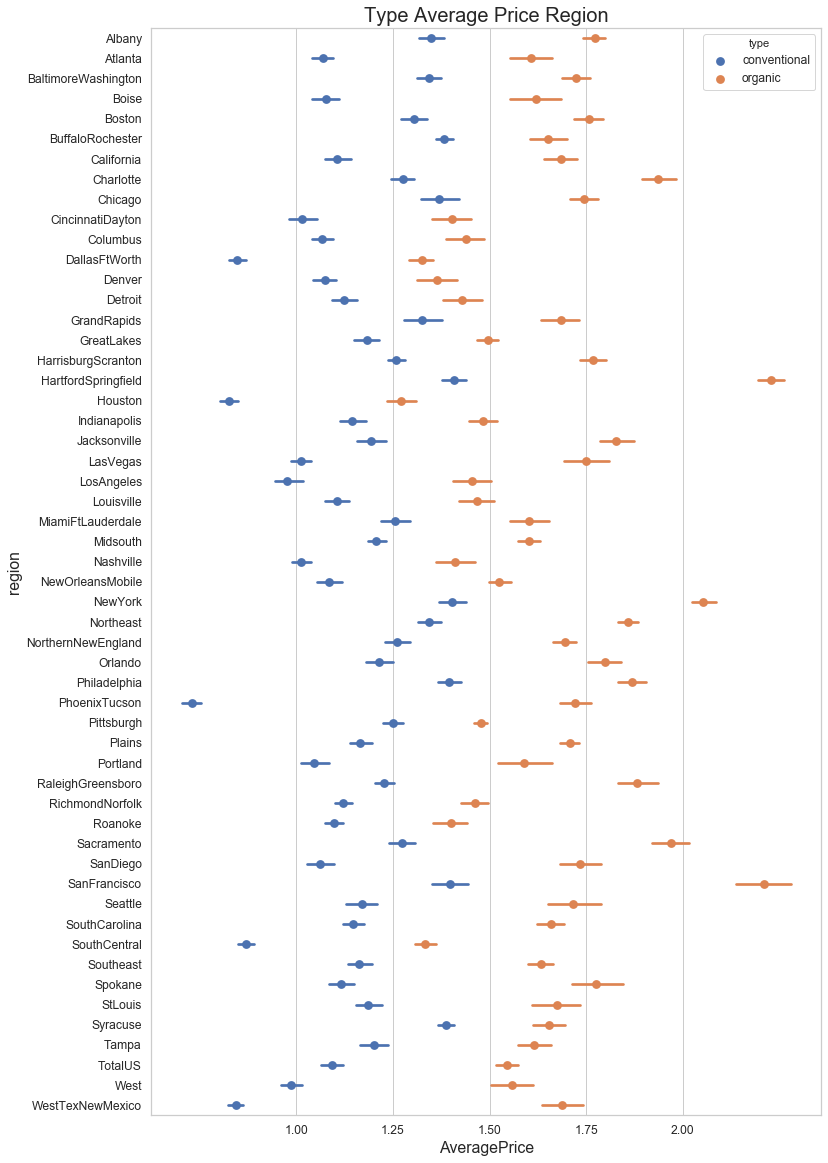

In [76]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('AveragePrice',{'fontsize' : 'large'})
plt.ylabel('region',{'fontsize':'large'})
plt.title("Type Average Price Region",{'fontsize':20})

**We can interpret that conventional type avocado average price is below 1.50.**

**Also Organic type avocado average price is more than 2.00 in Sanfrancisco,HartfordSpringfield and NewYork region.**

### Month Vs AveragePrice Vs Type

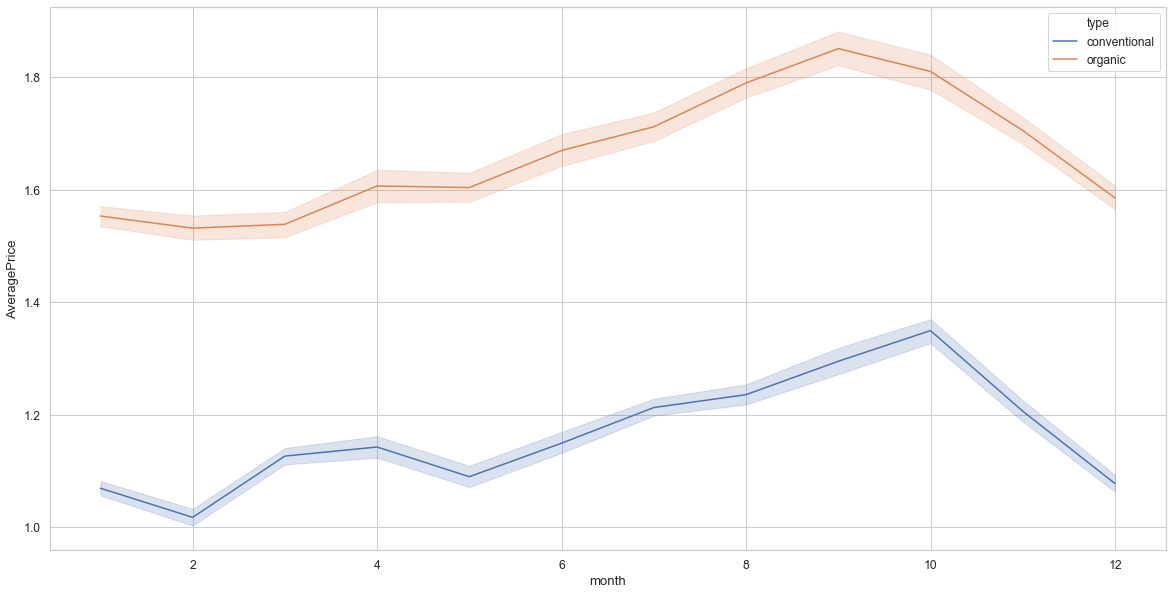

In [77]:
plt.figure(figsize=(20,10))
sns.lineplot(x="month",y="AveragePrice",hue="type",data=data)
plt.show()

**we can interpret that in the from the month of august till october, the avocado price is high in both type.**

**The convention type avocado price is varying as seen in plot compare to organic.**

**After october month the price of avocado is dropping in both type.**

# 9. Feature Engineering

**We will convert our categorical column into numeric column.**

## 9.1 Label Encoder techinque 

### Converting type feature


In [78]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [79]:
data['type']= label_encoder.fit_transform(data['type'])

In [80]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1,14


### Converting region feature

In [81]:
data['region']= label_encoder.fit_transform(data['region'])

In [82]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


# 10.Checking Outlier

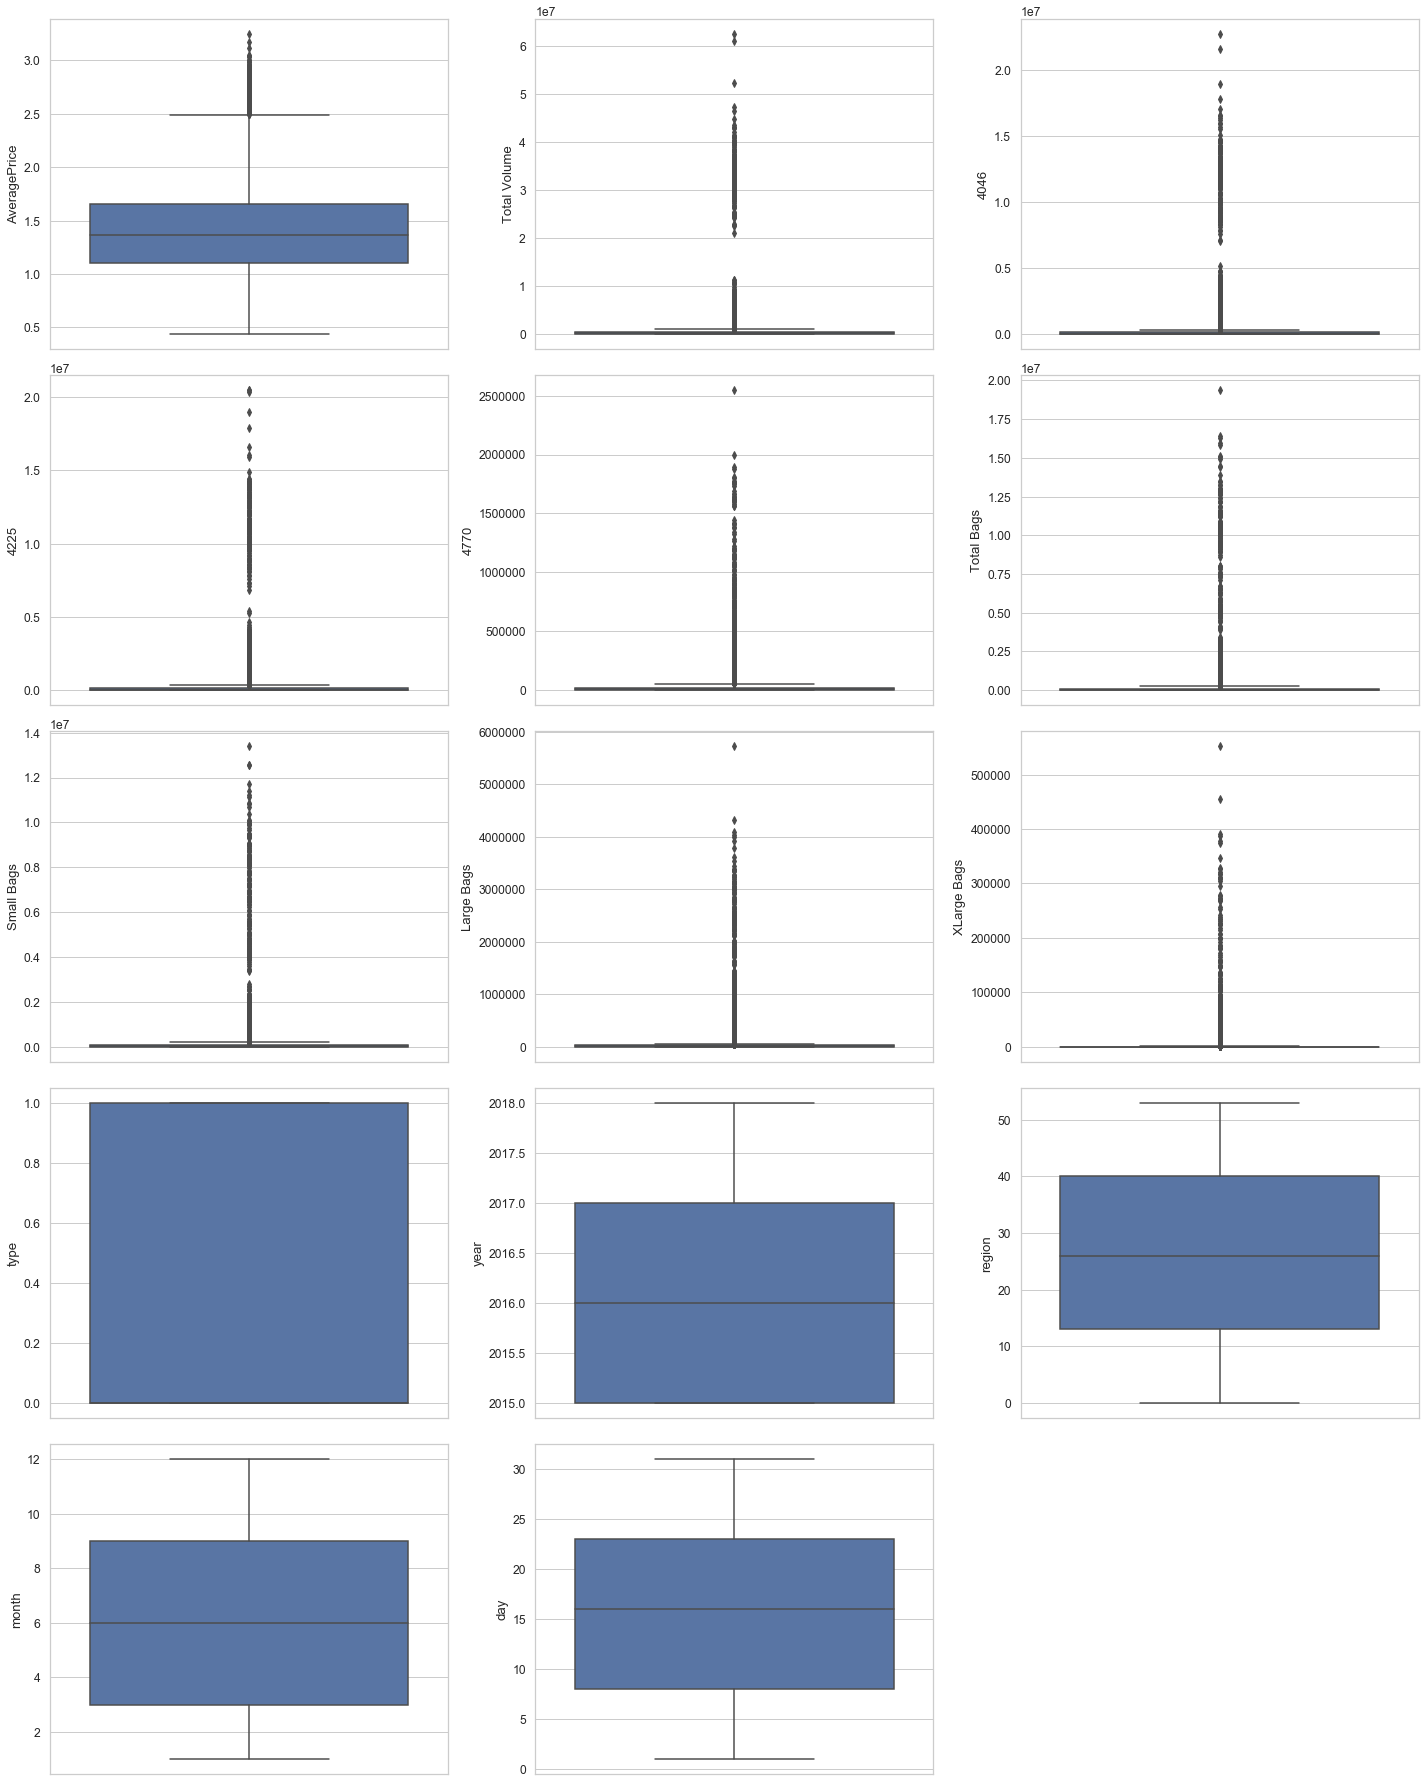

In [83]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column],orient="v")
    plotnumber+=1
plt.tight_layout()

**In above plot we can see there are lot of outliers present in data set.**


## 9.1 Removing Outliers with zscore technique

In [84]:
import scipy.stats as stats
z=np.abs(stats.zscore(data))
print(z)

[[0.18868864 0.22771641 0.23397205 ... 1.7002522  1.64763162 1.29185687]
 [0.13901962 0.23042664 0.23425869 ... 1.7002522  1.64763162 0.49423066]
 [1.18206895 0.21208462 0.23416346 ... 1.7002522  1.64763162 0.30339555]
 ...
 [1.15237477 0.24233073 0.23384933 ... 1.70081131 1.46495942 0.60817726]
 [1.30138182 0.24162464 0.23358384 ... 1.70081131 1.46495942 0.18944895]
 [0.53151208 0.24125273 0.23250267 ... 1.70081131 1.46495942 0.98707516]]


In [85]:
threshold=3
print(np.where(z<3))

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))


In [86]:
print(data.shape)

(18249, 14)


In [87]:
data_new=data[(z<3).all(axis=1)]

In [88]:
print(data.shape)
print(data_new.shape)
data=data_new
print("Shape after removing outliers",data.shape)

(18249, 14)
(17655, 14)
Shape after removing outliers (17655, 14)


# 10. Chekcing skewness

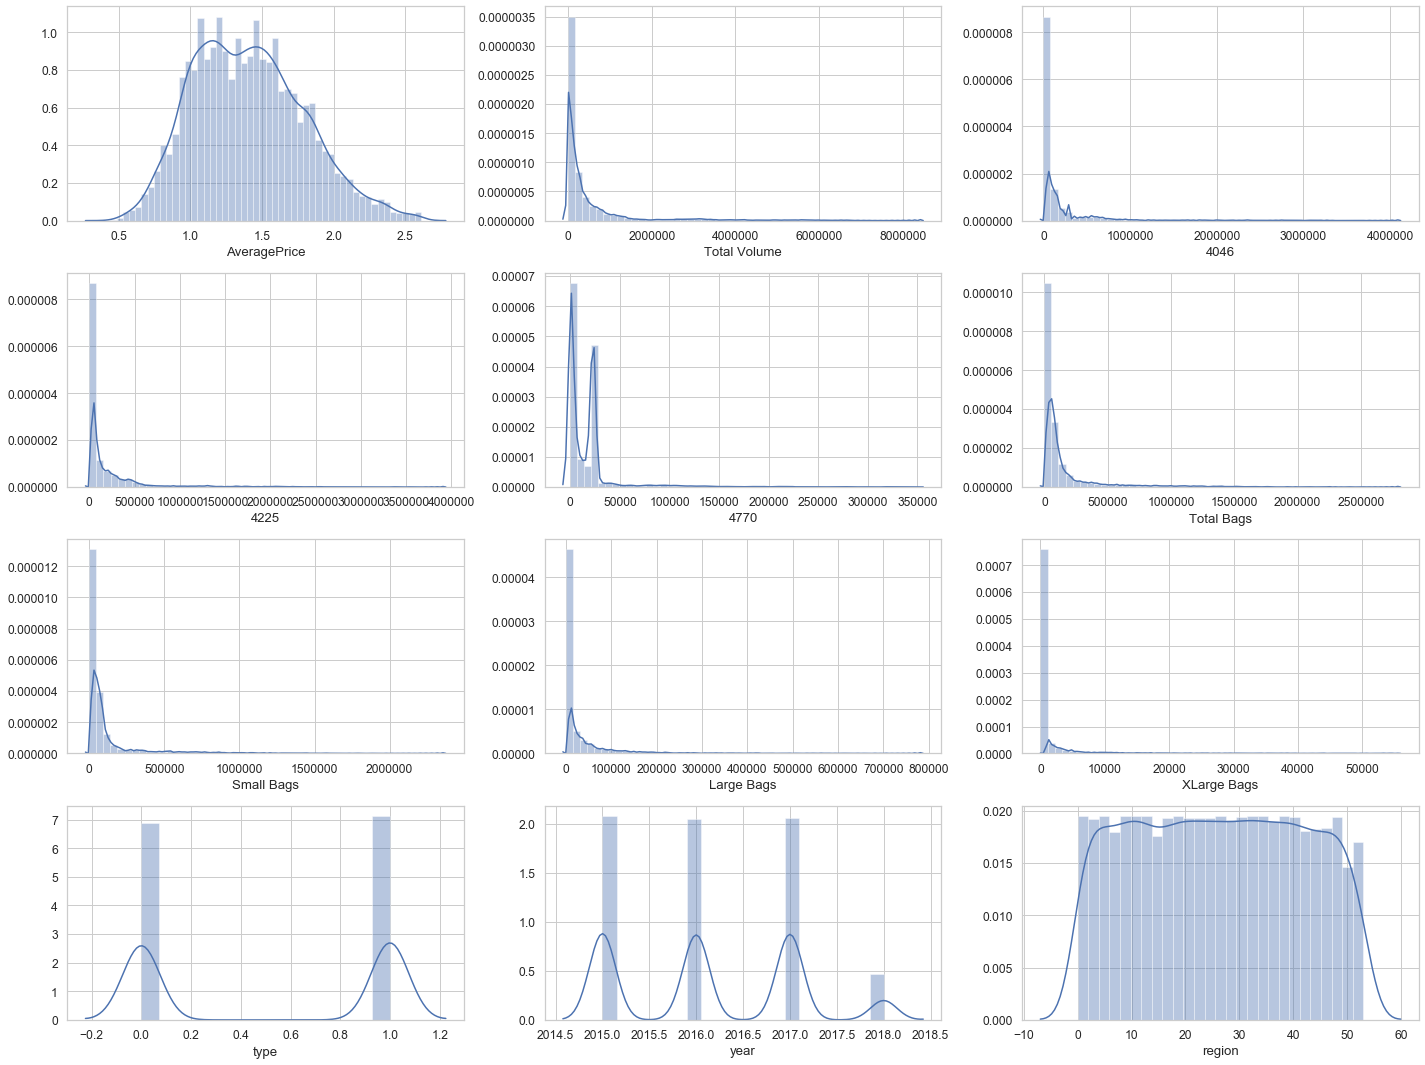

In [89]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

In [90]:
data.skew()

AveragePrice    0.377650
Total Volume    3.761876
4046            4.882474
4225            4.440188
4770            4.863834
Total Bags      4.059385
Small Bags      4.214765
Large Bags      5.048374
XLarge Bags     6.113321
type           -0.037280
year            0.230204
region          0.012790
month           0.107378
day             0.011798
dtype: float64

**As we can see there are some feature having right skewness.**

## 10.1 Removing Skewed data with log transformation

In [91]:
skew=("Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags")

In [92]:
for col in skew:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [93]:
data.skew()

AveragePrice    0.377650
Total Volume   -0.049617
4046           -0.306986
4225           -0.526158
4770           -0.792221
Total Bags     -0.384139
Small Bags     -0.788518
Large Bags     -0.610948
XLarge Bags     1.215590
type           -0.037280
year            0.230204
region          0.012790
month           0.107378
day             0.011798
dtype: float64

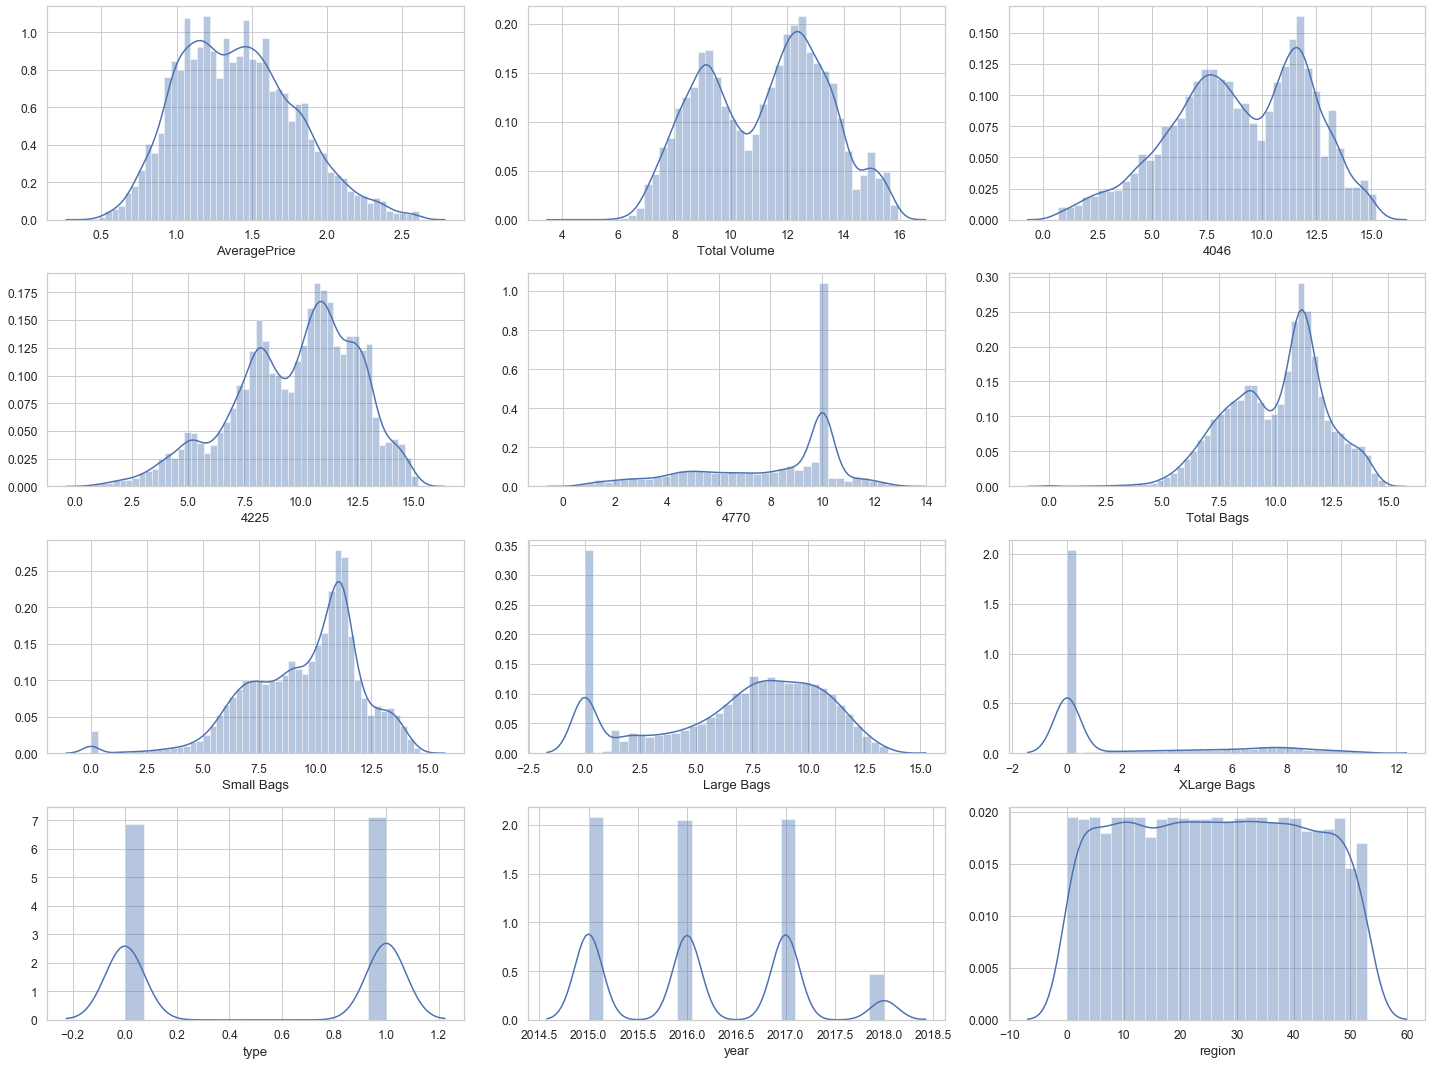

In [94]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**As we can see our skewness of data has been reduced but some column data is skewed.**

# 11. Spliting dataset

In [95]:
x=data.drop(["AveragePrice"],axis=1)

In [96]:
y=data.AveragePrice

# 12. Feature scaling with Standard scale techinque

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler=StandardScaler()

In [99]:
x_scaled=scaler.fit_transform(x)

# 13.Checking Multicollinearity

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif=pd.DataFrame()

In [102]:
vif["VIF"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [103]:
vif["Feature"]=x.columns

In [104]:
vif

,VIF,Feature
0,29.975594,Total Volume
1,4.077082,4046
2,6.653431,4225
3,1.106851,4770
4,21.137523,Total Bags
5,9.245463,Small Bags
6,2.653172,Large Bags
7,1.910659,XLarge Bags
8,3.259707,type
9,1.332664,year


**As we can see there are multicollinearity feature like Total Volume,4225,Total Bags,Small Bags available in dataset.but we will not drop any feature now**

# 14.Feature Extracting with PCA

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca=PCA()

In [107]:
principalComponent=pca.fit_transform(x_scaled)

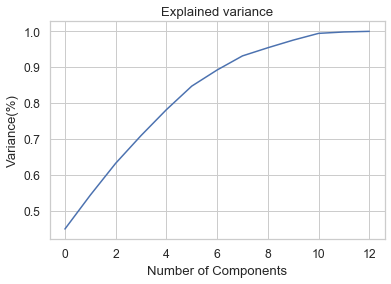

In [108]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

**From this plot i can choose number of componenet 8-10 where my data will cover more than 95%**

In [109]:
pca=PCA(n_components=9)

In [110]:
new_data_pca=pca.fit_transform(x_scaled)

In [111]:
new_data_pca

array([[ 0.57987544, -1.73662584,  0.58840685, ...,  0.30205679,
        -0.21592876, -0.28637459],
       [ 0.64776819, -1.73527399,  0.50869961, ...,  0.30402785,
        -0.21139613, -0.37485878],
       [ 0.40413666, -1.89095451,  0.36160902, ...,  0.20601104,
        -0.24303184, -0.52227991],
       ...,
       [ 1.63426046,  2.78870139,  0.48377864, ...,  0.7716359 ,
        -0.46712671, -0.19620266],
       [ 1.48544092,  2.78943648,  0.48582941, ...,  0.74851422,
        -0.49341612, -0.18933242],
       [ 1.46387995,  2.90983437,  0.72707791, ...,  0.98471894,
        -0.51857519,  0.02704764]])

**We have checked that we can use 10 feature for our model but we will not drop any feature now will check the model score then will decide whether to drop any feature or not.**

# 15. Building Forecast Model

## 15.1 Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [113]:
mlr=LinearRegression()

## 15.2 Choosing best random_state

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
mlr=LinearRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mlr.fit(x_train,y_train)
    pred_train=mlr.predict(x_train)
    pred_test=mlr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training R2_score is-",r2_score(y_train,pred_train)*100)
        print("Testing R2_score is-",r2_score(y_test,pred_test)*100)

At random state 16 Model perfrom well
At random state 16
Training R2_score is- 55.48308230146157
Testing R2_score is- 55.48662345139614
At random state 24 Model perfrom well
At random state 24
Training R2_score is- 55.469977606846314
Testing R2_score is- 55.51356320306036
At random state 30 Model perfrom well
At random state 30
Training R2_score is- 55.47632200095383
Testing R2_score is- 55.523173397063466
At random state 31 Model perfrom well
At random state 31
Training R2_score is- 55.475518355405626
Testing R2_score is- 55.541170993774855
At random state 43 Model perfrom well
At random state 43
Training R2_score is- 55.4740820788694
Testing R2_score is- 55.54348502225371
At random state 49 Model perfrom well
At random state 49
Training R2_score is- 55.49017687428084
Testing R2_score is- 55.454187883271736
At random state 97 Model perfrom well
At random state 97
Training R2_score is- 55.474511784287394
Testing R2_score is- 55.49577386148492
At random state 176 Model perfrom well
At r

**we can choose best random state 392**

In [115]:
 x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=392)

In [116]:
mlr=LinearRegression()

In [117]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 15.3 Performation Evaluation matrix

In [118]:
y_pred=mlr.predict(x_test)

In [119]:
mlr_score=r2_score(y_test,y_pred)

In [120]:
MAE=mean_absolute_error(y_test,y_pred)

In [121]:
MAE

0.2025053417676722

In [122]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [123]:
RMSE

0.2571707380766558

In [124]:
train_pred=mlr.predict(x_train)

In [125]:
train_score=r2_score(y_train,train_pred)

In [126]:
test_score=r2_score(y_test,y_pred)

In [127]:
print("Training Score:",train_score)
print("Test Score:",test_score)

Training Score: 0.5549169459525675
Test Score: 0.5549151803794949


**we can see model score is very less, we will try to convert polynomial features and will check the score.**

## 15.4 Converting to polynomial features

In [128]:
from sklearn.preprocessing import PolynomialFeatures


In [129]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [130]:
polynomial_converter.fit(x_scaled)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [131]:
poly_feats=polynomial_converter.transform(x_scaled)

In [132]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=392)

In [133]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_pred=mlr.predict(x_test)

In [135]:
r2_score(y_test,y_pred)

0.665633019199124

## 15.5 Choosing best polynomial degree for model.

In [136]:
train_rmse_error=[]
test_rmse_error=[]

for d in range(1,6):
    if d<=10:
        poly_converter=PolynomialFeatures(degree=d,include_bias=False)
        poly_features=poly_converter.fit_transform(x_scaled)
        x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.30,random_state=392)
    
        mlr=LinearRegression()
        mlr.fit(x_train,y_train)
    
        train_pred=mlr.predict(x_train)
        test_pred=mlr.predict(x_test)
    
        train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
        test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    
        train_rmse_error.append(train_rmse)
        test_rmse_error.append(test_rmse)
        d+=1

In [137]:
train_rmse_error

[0.25747540957457876,
 0.22138787171455926,
 0.17784091502846955,
 0.1307849843679726,
 0.06456665165367782]

In [138]:
test_rmse_error

[0.2571707380766558,
 0.22290091541265084,
 0.18678571865388405,
 0.19702933284936144,
 64544288.87996787]

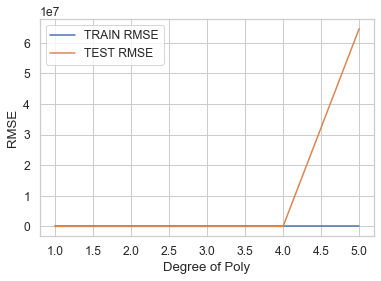

In [139]:
plt.plot(range(1,6),train_rmse_error,label="TRAIN RMSE")
plt.plot(range(1,6),test_rmse_error,label="TEST RMSE")

plt.ylabel("RMSE")
plt.xlabel("Degree of Poly")
plt.legend()

**We can see from above plot the best poly degree is 3.**

In [140]:
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)

In [141]:
polynomial_converter.fit(x_scaled)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [142]:
poly_feats=polynomial_converter.transform(x_scaled)

In [143]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=392)

In [144]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
y_pred=mlr.predict(x_test)

In [146]:
mlr_score=r2_score(y_test,y_pred)

In [147]:
mlr_score

0.7652059889982812

**We can see with polynomial degree the model score has increased from 55 to 76.**

## 15.6 Cross Validation score

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
score=cross_val_score(mlr,x_train,y_train,cv=10)

In [150]:
abs(score).mean()

0.761722158310233

## 15.7 Choosing best CV

In [151]:
for j in range(2,20):
    mlr_scores=cross_val_score(mlr,x_train,y_train,cv=j)
    mlr_s=mlr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",mlr_scores*100)
    print("r2 Score:",mlr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [73.182417   75.34155421]
r2 Score: 74.26198560441745


At CV:- 3
Cross validation score is: [73.88785874 75.66503928 76.33733704]
r2 Score: 75.29674502063558


At CV:- 4
Cross validation score is: [74.63711169 74.66425565 77.31607961 76.79123518]
r2 Score: 75.85217053094718


At CV:- 5
Cross validation score is: [75.07328873 75.34097369 75.86639306 76.23939759 76.62423801]
r2 Score: 75.8288582142199


At CV:- 6
Cross validation score is: [75.3639231  75.38693854 74.53632222 77.64448052 76.53347474 76.95911268]
r2 Score: 76.07070863295709


At CV:- 7
Cross validation score is: [75.15728841 75.73487072 74.81018722 76.87283636 76.85451249 75.82518056
 77.46448943]
r2 Score: 76.10276645587962


At CV:- 8
Cross validation score is: [75.21226451 75.61151695 74.61225863 74.87851991 78.10960237 77.11034408
 76.1183532  77.36893685]
r2 Score: 76.1277245626326


At CV:- 9
Cross validation score is: [75.16393789 75.6036708  75.70955734 75.12306989 76.28172204

**We can choose best cv is 12.**

In [152]:
score=cross_val_score(mlr,x_train,y_train,cv=12)

In [153]:
mlr_cv_score=abs(score).mean()

In [154]:
mlr_cv_score

0.7622407494874177

In [155]:
mlr_score

0.7652059889982812

In [156]:
mlr_MAE=mean_absolute_error(y_test,y_pred)

In [157]:
mlr_MAE

0.14195629349304728

# 16.1 Ridge Regression

In [158]:
from sklearn.linear_model import Ridge

In [159]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=392)

In [160]:
ridge_model=Ridge()

In [161]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## 16.2 Evaluation Matrix

In [162]:
test_predictions=ridge_model.predict(x_test)

In [163]:
r2_score(y_test,y_pred)

0.7652059889982812

In [164]:
Ridge_score=r2_score(y_test,y_pred)

In [165]:
MAE=mean_absolute_error(y_test,y_pred)

In [166]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [167]:
MAE

0.14195629349304728

In [168]:
RMSE

0.18678571865388405

## 16.3 Cross Validation Score

In [169]:
from sklearn.model_selection import cross_val_score

In [170]:
score=cross_val_score(ridge_model,x_train,y_train,cv=10)

In [171]:
abs(score).mean()

0.7613561306496895

## 16.4 Chossing Best CV 

In [172]:
for j in range(2,15):
    knn_scores=cross_val_score(ridge_model,x_train,y_train,cv=j)
    knn_s=knn_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_scores*100)
    print("r2 Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [73.91108899 75.95449018]
r2 Score: 74.93278958113272


At CV:- 3
Cross validation score is: [74.73076523 75.75056823 76.58444918]
r2 Score: 75.68859421267177


At CV:- 4
Cross validation score is: [75.11078556 74.77351838 77.32377683 76.77060529]
r2 Score: 75.99467151397853


At CV:- 5
Cross validation score is: [74.95208825 75.27278234 75.71616473 76.64972951 76.56476007]
r2 Score: 75.8311049817392


At CV:- 6
Cross validation score is: [75.27703577 75.33902678 74.77135827 77.51596262 76.58378484 76.91030261]
r2 Score: 76.06624514897416


At CV:- 7
Cross validation score is: [74.95715376 75.6794244  74.74592246 76.48464552 77.03172497 75.93584919
 77.38975595]
r2 Score: 76.03206803579374


At CV:- 8
Cross validation score is: [74.97007038 75.60301789 74.55603159 75.11396542 77.79868138 77.23851954
 76.21782935 77.29361164]
r2 Score: 76.0989658990865


At CV:- 9
Cross validation score is: [74.97108044 75.6181174  75.53142954 75.15192917 75.90551169

**We can choose cv 12.**

In [173]:
score=cross_val_score(ridge_model,x_train,y_train,cv=12)

In [174]:
ridge_cv_score=abs(score).mean()

In [175]:
ridge_cv_score

0.761583500061601

In [176]:
Ridge_score

0.7652059889982812

In [177]:
ridge_MAE=mean_absolute_error(y_test,y_pred)

In [178]:
ridge_MAE

0.14195629349304728

# 16.1 KNN

In [179]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=392)

In [180]:
from sklearn.neighbors import KNeighborsRegressor

In [181]:
knn=KNeighborsRegressor()

In [182]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

## 16.2 Evaluation Matrix

In [183]:
y_pred=knn.predict(x_test)

In [184]:
knn_score=r2_score(y_test,y_pred)

In [185]:
knn_score

0.7731897911163494

In [186]:
MAE=mean_absolute_error(y_test,y_pred)

In [187]:
MAE

0.13290692845006605

In [188]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [189]:
RMSE

0.1835825759842739

## 16.3 Cross Validation Score

In [190]:
from sklearn.model_selection import cross_val_score

In [191]:
score=cross_val_score(knn,x_train,y_train,cv=10)

In [192]:
abs(score).mean()

0.7656643512272493

## 16.4 Chossing Best CV 

In [193]:
for j in range(2,15):
    knn_scores=cross_val_score(knn,x_train,y_train,cv=j)
    knn_s=knn_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_scores*100)
    print("r2 Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [71.47069034 71.9613609 ]
r2 Score: 71.71602561974892


At CV:- 3
Cross validation score is: [73.64545791 74.37590829 74.59300833]
r2 Score: 74.2047915095457


At CV:- 4
Cross validation score is: [74.30080937 75.21261427 75.82071984 75.97039194]
r2 Score: 75.32613385619754


At CV:- 5
Cross validation score is: [74.90830172 75.78877762 75.26553653 76.33828631 75.8810331 ]
r2 Score: 75.63638705595712


At CV:- 6
Cross validation score is: [74.96554594 76.27856712 76.80733644 76.93169086 76.35810204 76.40500827]
r2 Score: 76.29104177838256


At CV:- 7
Cross validation score is: [74.52548922 76.49147668 76.43007673 76.62709625 76.86927624 76.39018421
 76.39880842]
r2 Score: 76.24748682161766


At CV:- 8
Cross validation score is: [75.46061292 75.86980549 75.8096202  76.98697878 76.67502827 77.09822017
 77.52854839 75.88338613]
r2 Score: 76.41402504474344


At CV:- 9
Cross validation score is: [75.08682561 75.6476642  76.87242481 76.86582725 78.0781529

**We can choose cv 14**

In [194]:
score=cross_val_score(knn,x_train,y_train,cv=14)

In [195]:
knn_cv_score=abs(score).mean()

In [196]:
knn_cv_score

0.7685605970433145

In [197]:
knn_score=r2_score(y_test,y_pred)

In [198]:
knn_score

0.7731897911163494

In [199]:
knn_MAE=mean_absolute_error(y_test,y_pred)

In [200]:
knn_MAE

0.13290692845006605

# 17.1 Random Forest 

In [201]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=392)

In [202]:
from sklearn.ensemble import RandomForestRegressor

In [203]:
rfr=RandomForestRegressor()

In [204]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [205]:
y_pred=rfr.predict(x_test)

## 17.2 Evaluation Matrix

In [206]:
rfr_score=r2_score(y_test,y_pred)

In [207]:
rfr_score

0.8723200821611472

In [208]:
MAE=mean_absolute_error(y_test,y_pred)

In [209]:
MAE

0.09690239758353783

In [210]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [211]:
RMSE

0.13774043730407617

## 17.3 Cross Validation Score

In [212]:
score=cross_val_score(rfr,x_train,y_train,cv=10)

In [213]:
abs(score).mean()

0.8700463993241447

## 17.4 Chossing Best CV 

In [214]:
for j in range(2,9):
    rfr_scores=cross_val_score(rfr,x_train,y_train,cv=j)
    rfr_s=rfr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfr_scores*100)
    print("r2 Score:",rfr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [82.12123266 83.41065637]
r2 Score: 82.76594451753436


At CV:- 3
Cross validation score is: [84.57431804 84.65027613 85.59033248]
r2 Score: 84.93830888633815


At CV:- 4
Cross validation score is: [85.71703074 84.89752524 86.36359726 86.16381245]
r2 Score: 85.78549142032517


At CV:- 5
Cross validation score is: [86.19142313 85.63461887 85.45661486 86.26515658 86.49411837]
r2 Score: 86.00838636208789


At CV:- 6
Cross validation score is: [86.44510299 86.42351886 85.97172287 86.6788887  86.93312356 86.64037749]
r2 Score: 86.51545574636773


At CV:- 7
Cross validation score is: [86.08166553 86.78852121 85.4972015  86.51899888 86.33643797 86.96790288
 86.9282216 ]
r2 Score: 86.44556422311486


At CV:- 8
Cross validation score is: [86.70956139 86.95929386 85.91378839 86.1302383  86.96243741 87.39437032
 87.46895834 86.4952937 ]
r2 Score: 86.75424271469214




**we can choose cv 8.**

In [215]:
score=cross_val_score(rfr,x_train,y_train,cv=8)

In [216]:
rfr_cv_score=abs(score).mean()

In [217]:
rfr_cv_score

0.8668633947882796

In [218]:
rfr_score=r2_score(y_test,y_pred)

In [219]:
rfr_score

0.8723200821611472

In [220]:
rfr_MAE=mean_absolute_error(y_test,y_pred)

In [221]:
rfr_MAE

0.09690239758353783

# 18.1 Ada Booster

In [222]:
from sklearn.ensemble import AdaBoostRegressor

In [223]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=392)

In [224]:
adar=AdaBoostRegressor()

In [225]:
adar.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

## 18.2 Evaluation Matrix

In [226]:
y_pred=adar.predict(x_test)

In [227]:
r2_score(y_test,y_pred)

0.6167853193271045

In [228]:
adar_score=r2_score(y_test,y_pred)

In [229]:
adar_score

0.6167853193271045

In [230]:
MAE=mean_absolute_error(y_test,y_pred)

In [231]:
MAE

0.19238196697525412

In [232]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [233]:
RMSE

0.23862790548251256

## 18.3 Cross Validation score on AdaBoostRegressor

In [234]:
score=cross_val_score(adar,x_train,y_train,cv=10)

In [235]:
abs(score).mean()

0.6230907573289313

## 18.4 Choosing Best CV

In [236]:
for j in range(2,12):
    adar_score=cross_val_score(adar,x_train,y_train,cv=j)
    adar_s=adar_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",adar_score*100)
    print("R2 Score:",adar_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [61.17094718 62.12268682]
R2 Score: 61.64681700115282


At CV:- 3
Cross validation score is: [62.06892588 61.44646723 62.78710765]
R2 Score: 62.1008335868948


At CV:- 4
Cross validation score is: [62.55830383 62.33533116 62.17626329 63.91191783]
R2 Score: 62.74545402928287


At CV:- 5
Cross validation score is: [61.76578872 62.96337114 62.76121308 63.26906527 62.9425033 ]
R2 Score: 62.740388305100915


At CV:- 6
Cross validation score is: [60.33622464 63.84596486 61.7174234  61.62617013 63.01063619 63.46091385]
R2 Score: 62.33288884240815


At CV:- 7
Cross validation score is: [61.78689689 63.34640771 64.10590029 61.05577515 61.569713   64.39128887
 63.15493585]
R2 Score: 62.77298825243606


At CV:- 8
Cross validation score is: [62.05067742 62.49540891 61.69422009 61.98625972 61.90223597 62.2202869
 63.43005252 63.20876465]
R2 Score: 62.37348827246198


At CV:- 9
Cross validation score is: [62.61799333 62.15696621 60.83650595 63.51456963 61.2038685

**We can choose cv 11**

In [237]:
score=cross_val_score(adar,x_train,y_train,cv=11)

In [238]:
adar_cv_score=(abs(score).mean())

In [239]:
adar_cv_score

0.6230532147111989

In [240]:
adar_score=r2_score(y_test,y_pred)

In [241]:
adar_score

0.6167853193271045

In [242]:
adar_MAE=mean_absolute_error(y_test,y_pred)

In [243]:
adar_MAE

0.19238196697525412

# 19.1 Xtreme Gradient Boosting

In [244]:
import xgboost as xgb

In [245]:
x_train,x_test,y_train,y_test=train_test_split(poly_feats,y,test_size=0.30,random_state=392)

In [246]:
xgb=xgb.XGBRegressor()

In [247]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## 19.2 Evaluation Matrix

In [248]:
y_pred=xgb.predict(x_test)

In [249]:
r2_score(y_test,y_pred)

0.8879017392075639

In [250]:
xgb_score=r2_score(y_test,y_pred)

In [251]:
MAE=mean_absolute_error(y_test,y_pred)

In [252]:
MAE

0.09399805639878024

In [253]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [254]:
RMSE

0.12906235858490564

## 19.3 Cross Validation score on Xtreme Gradient Boosting

In [255]:
score=cross_val_score(xgb,x_train,y_train,cv=5)

In [256]:
abs(score).mean()

0.8796855145142863

## 19.4 Choosing Best CV

In [257]:
for j in range(2,20):
    xgb_score=cross_val_score(xgb,x_train,y_train,cv=j)
    xgb_s=xgb_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",xgb_score*100)
    print("R2 Score:",xgb_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [84.86924364 85.59479415]
R2 Score: 85.23201889544727


At CV:- 3
Cross validation score is: [86.39017395 86.50787364 87.58535895]
R2 Score: 86.8278021776968


At CV:- 4
Cross validation score is: [86.90720893 87.28051713 88.13700941 88.04114516]
R2 Score: 87.5914701600139


At CV:- 5
Cross validation score is: [87.72680796 87.9730085  87.72297164 88.24693926 88.17302989]
R2 Score: 87.96855145142864


At CV:- 6
Cross validation score is: [88.05853747 88.92051756 87.97072345 88.19609507 89.08666485 88.41868128]
R2 Score: 88.4418699466497


At CV:- 7
Cross validation score is: [87.81057138 88.63240293 87.91159171 89.22307851 88.08587639 89.26536796
 89.70186541]
R2 Score: 88.6615363267169


At CV:- 8
Cross validation score is: [88.93653731 88.42278117 88.43563487 88.45431961 88.4663388  89.37455312
 89.6653733  88.39697854]
R2 Score: 88.76906458910983


At CV:- 9
Cross validation score is: [88.7688394  88.20648684 88.50002762 88.11327257 89.41359104 8

**We can choose best cv is 19**

In [258]:
score=cross_val_score(xgb,x_train,y_train,cv=19)

In [259]:
xgb_cv_score=(abs(score).mean())

In [260]:
xgb_cv_score

0.8922532494962775

In [261]:
xgb_score=r2_score(y_test,y_pred)

In [262]:
xgb_score

0.8879017392075639

In [263]:
xgb_MAE=mean_absolute_error(y_test,y_pred)

In [264]:
xgb_MAE

0.09399805639878024

# 20.Lets choose the best model using Cross validation comparism

In [273]:
Multiplelinear_Regression={"R2 Score":round(mlr_score,2),
                    "CV Score":round(mlr_cv_score,2),
                    "Difference":mlr_score-mlr_cv_score,
                    "MAE":mlr_MAE}
Ridge_Regression={"R2 Score":round(Ridge_score,2),
                 "CV Score":round(ridge_cv_score,2),
                 "Difference":Ridge_score-ridge_cv_score,
                 "MAE":ridge_MAE}
KNeighbors_Regressor={"R2 Score":round(knn_score,2),
                    "CV Score":round(knn_cv_score,2),
                    "Difference":knn_score-knn_cv_score,
                     "MAE":knn_MAE}
Random_Forest={"R2 Score":round(rfr_score,2),
                    "CV Score":round(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score,
                     "MAE":rfr_MAE}
AdaBooster_Regressor={"R2 Score":round(adar_score,2),
                    "CV Score":round(adar_cv_score,2),
                    "Difference":adar_score-adar_cv_score,
                     "MAE":adar_MAE}
XtremeGradientBoosting={"R2 Score":round(xgb_score,2),
                    "CV Score":round(xgb_cv_score,2),
                    "Difference":xgb_score-xgb_cv_score,
                    "MAE":xgb_MAE}


In [274]:
data=np.array([[mlr_score,mlr_cv_score,mlr_score-mlr_cv_score,mlr_MAE],[Ridge_score,ridge_cv_score,Ridge_score-ridge_cv_score,ridge_MAE],[knn_score,knn_cv_score,knn_score-knn_cv_score,knn_MAE],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score,rfr_MAE],[adar_score,adar_cv_score,adar_score-adar_cv_score,adar_MAE],[xgb_score,xgb_cv_score,xgb_score-xgb_cv_score,xgb_MAE]])

In [275]:
index_value=["MultiLinear Regression","Ridge Regression","KNN Regression","RandomForest Regression","AdaBooster Regressor","XtremeGradientBoosting"]

In [276]:
columns_value=["r2 Score","Cross Validation Score","Difference","MAE"]

In [277]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [278]:
model_selection

,r2 Score,Cross Validation Score,Difference,MAE
MultiLinear Regression,0.765206,0.762241,0.002965,0.141956
Ridge Regression,0.765206,0.761584,0.003622,0.141956
KNN Regression,0.773190,0.768561,0.004629,0.132907
RandomForest Regression,0.872320,0.866863,0.005457,0.096902
AdaBooster Regressor,0.616785,0.623053,-0.006268,0.192382
XtremeGradientBoosting,0.887902,0.892253,-0.004352,0.093998


**From the above table we can analyse the difference and MAE error and have got conclusion that Random Forest Regression is performing better and best model to choose among others.**

# 21. Hyperparameter Tuning with Grid SearchCV

In [284]:
from sklearn.model_selection import GridSearchCV


In [285]:
import xgboost as xgb

In [286]:
xgb=xgb.XGBRegressor()

In [298]:
params = {"colsample_bytree":[1,2,3],
          "max_depth": np.arange(3,10,1),
          'learning_rate': [0.1,0.3,0.5,],
          }
          
                

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [299]:
grd=GridSearchCV(xgb,param_grid=params)

In [300]:
grd.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.3, max_delta_step=0,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    nu...
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters

In [301]:
grd.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9}

In [302]:
xgb=grd.best_estimator_

In [303]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [304]:
xgb_score=r2_score(y_test,y_pred)

In [305]:
xgb_score

0.8879017392075639

# 23. Saving the model

In [314]:
import pickle

### 23.1 Saving model

In [315]:
filename="Avocado_predict.pkl"

In [316]:
pickle.dump(mlr,open(filename,"wb"))

### 23.2 Saving polyconvertor

In [317]:
filename="polyConvertor.pkl"

In [318]:
pickle.dump(poly_feats,open(filename,"wb"))